In [1]:
import pandas as pd
import pprint
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import matplotlib.pyplot as plt

In [2]:
consol_pre = pd.read_csv('./data/pre_consolidated.csv')
sep_pre = consol_pre[['ID'] + list(consol_pre.columns[14:-2])]
sep_pre_col_names = ['ID', 'Q14', 'Q15', 'Q16', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25']
sep_pre.columns = sep_pre_col_names

consol_post = pd.read_csv('./data/post_consolidated.csv')
sep_post = consol_post[['ID'] + list(consol_post.columns[14:-3])]
sep_post_col_names = ['ID', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26']
sep_post.columns = sep_post_col_names

pre_fr = sep_pre[['ID', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25']]
post_fr = sep_post[['ID', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26']]

In [3]:
from nltk import sent_tokenize

all_responses = []
for col in pre_fr.columns[1:]:
    pre_sent = pre_fr[col].apply(sent_tokenize)
    pre_sent = pre_sent.explode()
    for fr in list(pre_sent):
        all_responses.append(fr)

for col in post_fr.columns[1:]:
    post_sent = post_fr[col].apply(sent_tokenize)
    post_sent = post_sent.explode()
    for fr in list(post_sent):
        all_responses.append(fr)

len(all_responses)

253

In [5]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = tfidf.fit_transform(all_responses)
dtm

<253x384 sparse matrix of type '<class 'numpy.float64'>'
	with 1903 stored elements in Compressed Sparse Row format>

In [22]:
lda_model = LatentDirichletAllocation(n_components=4)
lda_model.fit(dtm)

LatentDirichletAllocation(n_components=4)

In [24]:
for index,topic in enumerate(lda_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index+1}')
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #1
['don', 'bred', 'experience', 'really', 'shows', 'community', 'breeders', 'think', 'dog', 'dogs']


THE TOP 15 WORDS FOR TOPIC #2
['breeder', 'things', 'aren', 'purebred', 'people', 'know', 'work', 'breeders', 'think', 'dogs']


THE TOP 15 WORDS FOR TOPIC #3
['learned', 'helpful', 'lot', 'breeds', 'interested', 'feel', 'breeder', 'breeders', 'like', 'resources']


THE TOP 15 WORDS FOR TOPIC #4
['time', 'belief', 'learn', 'way', 'breeders', 'able', 'think', 'selective', 'breeding', 'want']




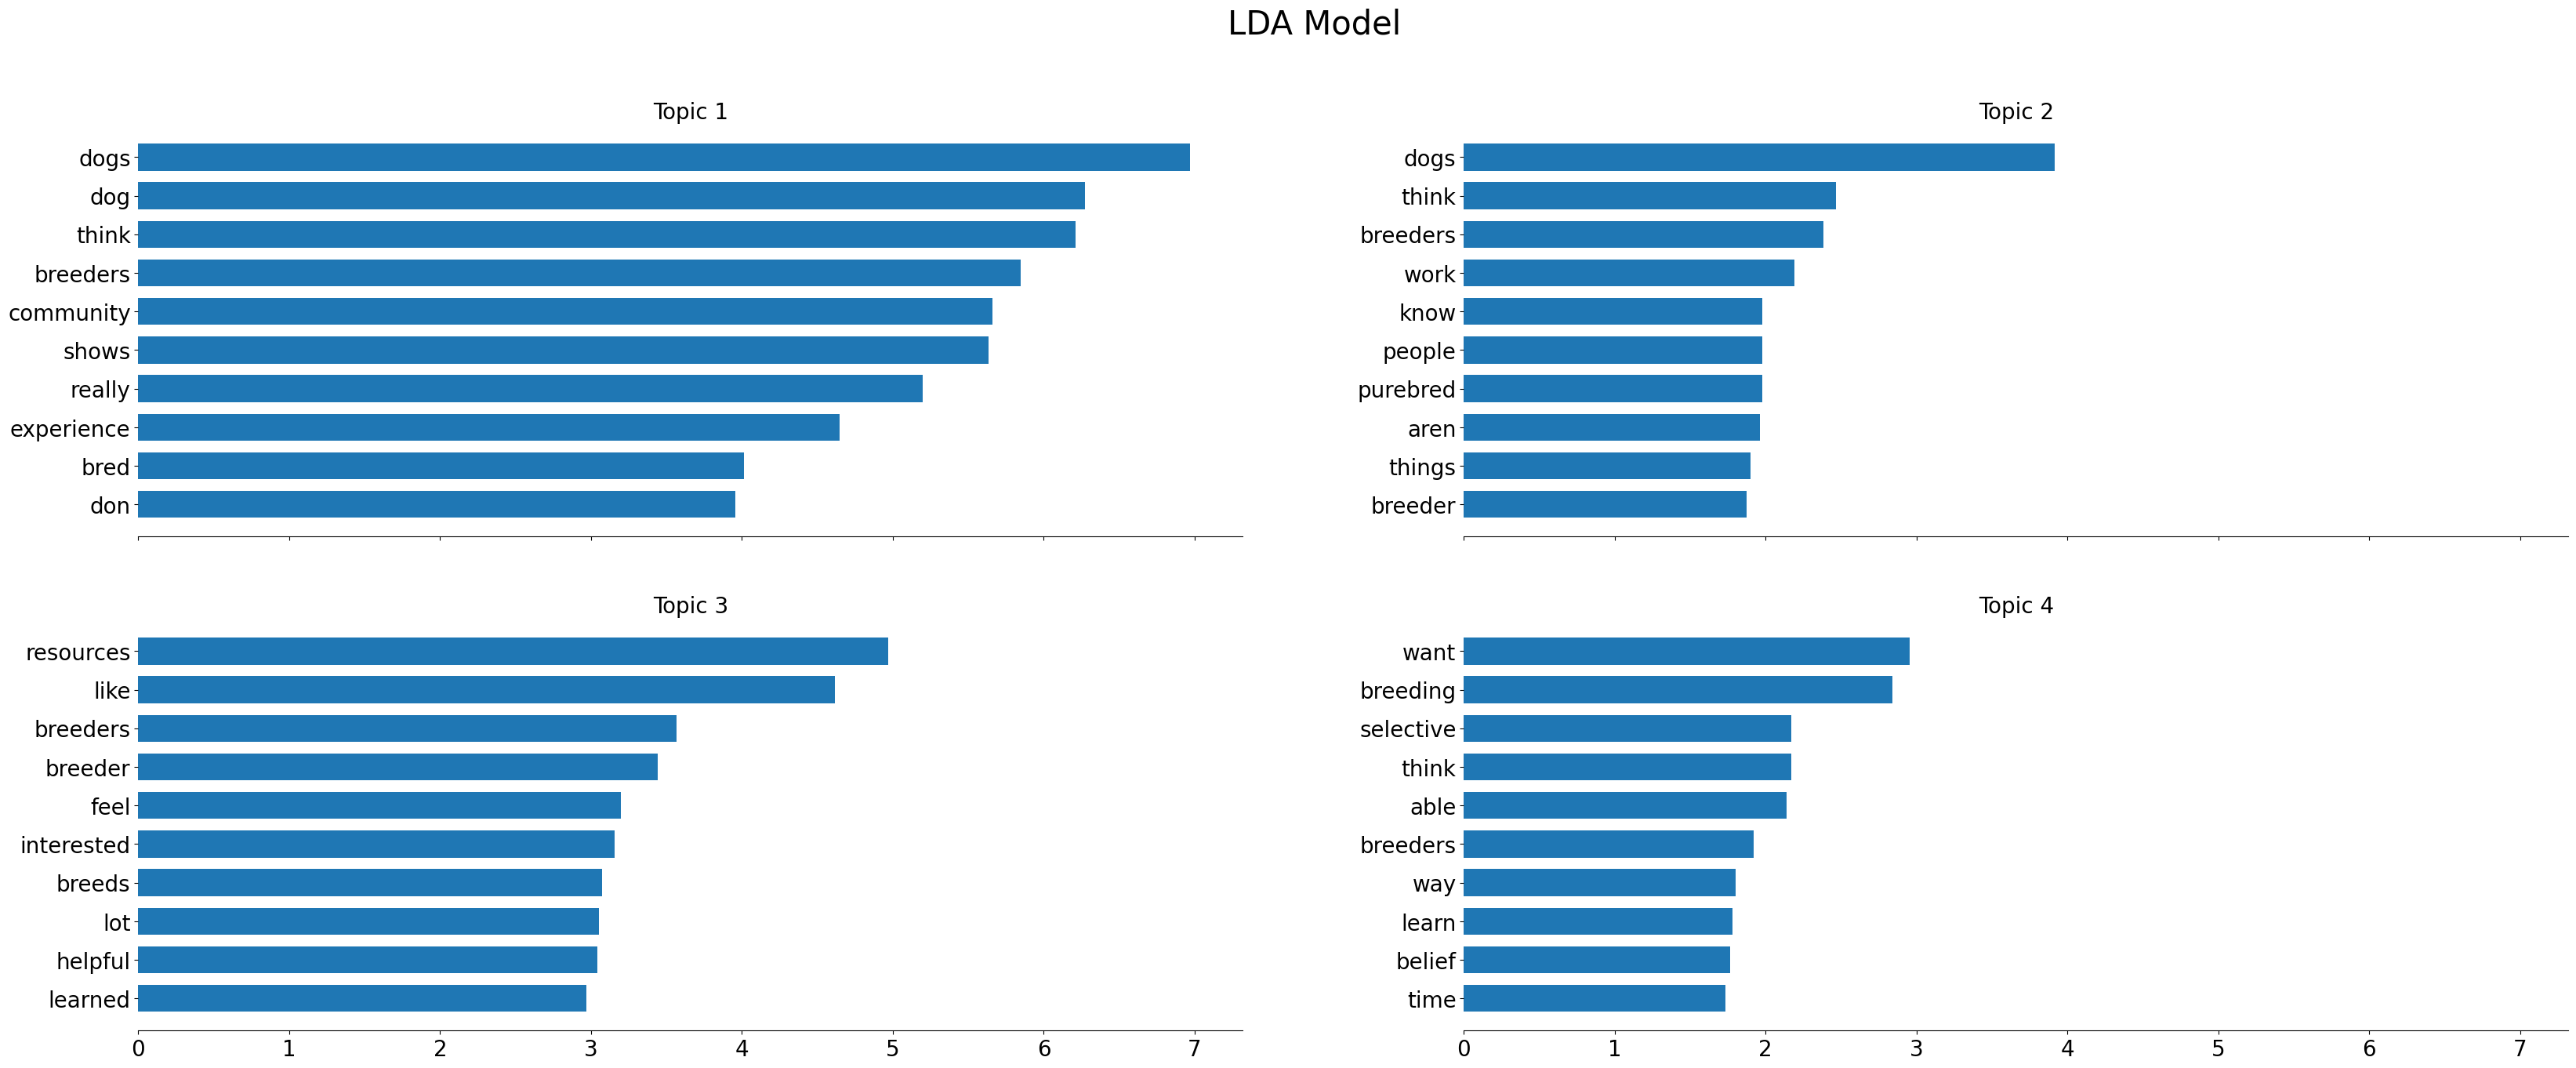

In [26]:
n_components = 4
top_words = 10

# plotting
fig, axes = plt.subplots(2, (n_components+1)//2, figsize=(40,15), sharex=True)
axes = axes.flatten()

# looping through each topic
for topic_idx, topic in enumerate(lda_model.components_):
    # topic manipuluation
    top_features_ind = topic.argsort()[:-top_words - 1:-1] # getting top word indices for each topic
    top_features = [tfidf.get_feature_names_out()[i] for i in top_features_ind] # getting the actual text
    weights = topic[top_features_ind] # getting the probability of each word

    # plotting
    ax = axes[topic_idx]
    ax.barh(top_features, weights, height=.7)
    ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 20})
    ax.invert_yaxis()
    ax.tick_params(axis="both", which="major", labelsize=20)
    for i in "top right left".split():
        ax.spines[i].set_visible(False)
    fig.suptitle('LDA Model', fontsize=30)

plt.show()

In [ ]:
# where is a word in a topic with highest prob, restricted to that topic alone
# break up pre and post
# compare individual word probs

In [ ]:
# sentiment analysis
# qualitative work good integration
# correlate to likert values, like dla